---
# COSC2753 | Machine Learning

## Task 0: Exploratory Data Analysis (EDA)
---


# 1. Introduction

This notebook addresses **Task 0: Exploratory Data Analysis (EDA)** for Assignment 2. The objective is to investigate the metadata and visual characteristics of the paddy plant image dataset to inform preprocessing decisions and model design strategies for the subsequent machine learning tasks.

The dataset is composed of the following components:

- **meta_train.csv**: Metadata file containing 10,407 labeled entries with four key columns:

  - `image_id`: Unique identifier that maps to image filenames (.jpg).
  - `label`: Type of paddy disease, serving as the target class for Task 1.
  - `variety`: Paddy plant variety, used as the classification target in Task 2.
  - `age`: Age of the plant in days, which is the regression target in Task 3.

- **train_images/**: Directory containing training images organized into subdirectories named after disease labels. Each file corresponds to an entry in `meta_train.csv`.

- **test_images/**: Directory with 3,469 unlabeled images used for model inference and submission.

The analysis focuses on examining the distribution of health labels, varieties, and age values. Visual inspection of image samples and statistical plots support the identification of class imbalance, feature skewness, and potential preprocessing requirements. Insights gained here guide all subsequent modeling efforts for Tasks 1–3.


# 2. Library Imports & Setup

This section imports essential libraries for data exploration, image handling, and machine learning preparation. It also configures global parameters such as plotting styles and data directories.


In [1]:
# --- System Path Configuration ---
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

# --- Core Libraries ---
import pandas as pd
import numpy as np

# --- Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Image Processing ---
from PIL import Image

# --- Reproducibility ---
np.random.seed(42)

# --- Plotting Style ---
plt.style.use("ggplot")

# --- Dataset Paths ---
dir_train_dataset = os.path.join("data", "train")  # folder containing train_images/
dir_test_dataset = os.path.join("data", "test")  # folder containing test_images/

# 3. Load Metadata

This section loads the training metadata from `meta_train.csv`, which contains image identifiers and associated labels including:

- `label`: disease class (target for classification)
- `variety`: paddy variety (categorical feature)
- `age`: age of the plant in days (numerical feature)

Each image is stored in a subdirectory named after its label. We also construct the full image path for each entry to streamline later access.


In [2]:
# Load the CSV file
df = pd.read_csv("../data/meta_train.csv")

# Construct full image paths
df["image_path"] = df.apply(
    lambda row: os.path.join("../data/train_images", row["label"], row["image_id"]),
    axis=1,
)

# Basic info
print("Total records:", len(df))
df.head()

Total records: 10407


,image_id,label,variety,age,image_path
0,100330.jpg,bacterial_leaf_blight,ADT45,45,../data/train_images\bacterial_leaf_blight\100...
1,100365.jpg,bacterial_leaf_blight,ADT45,45,../data/train_images\bacterial_leaf_blight\100...
2,100382.jpg,bacterial_leaf_blight,ADT45,45,../data/train_images\bacterial_leaf_blight\100...
3,100632.jpg,bacterial_leaf_blight,ADT45,45,../data/train_images\bacterial_leaf_blight\100...
4,101918.jpg,bacterial_leaf_blight,ADT45,45,../data/train_images\bacterial_leaf_blight\101...


# 4. Exploratory Data Analysis (EDA)

This section explores the distribution of key features (`label`, `variety`, and `age`) and provides visual samples from the dataset. These insights support downstream decisions in data preprocessing and model development for classification and regression tasks.


## 4.1. Distribution of Health Labels

Displays the frequency of each paddy plant health category. This reveals class imbalance, which has implications for classification task performance and model robustness.


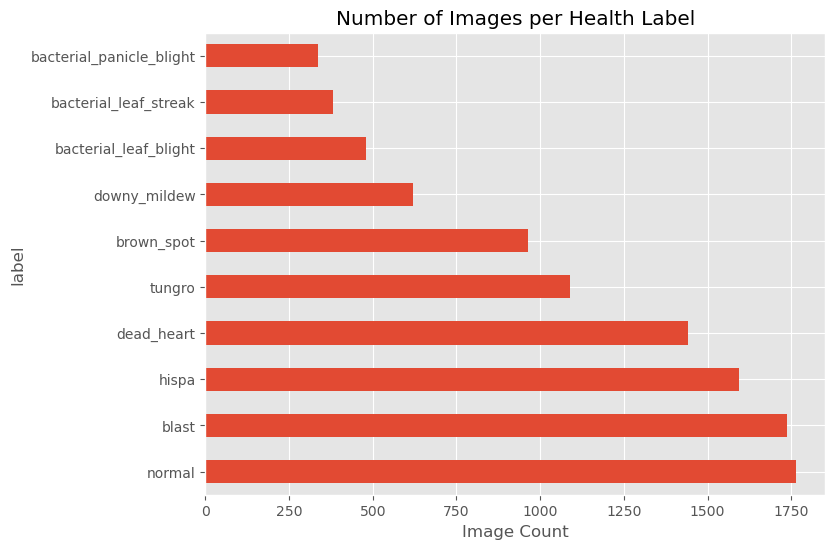

In [3]:
# Bar chart of disease label frequency
df["label"].value_counts().plot(
    kind="barh", figsize=(8, 6), title="Number of Images per Health Label"
)
plt.xlabel("Image Count")
plt.show()

The health label distribution shows considerable imbalance among disease classes. While categories such as `normal`, `blast`, and `hispa` have a high number of images (over 1500 each), several other diseases such as `bacterial_panicle_blight` and `bacterial_leaf_streak` are represented by fewer than 500 samples. This imbalance may bias models toward over-represented classes, negatively impacting recall and precision for under-represented diseases.


## 4.2. Distribution of Variety Labels

Plots the distribution of paddy plant varieties. Detecting skew in this categorical feature is relevant for classification model design in the variety identification task.


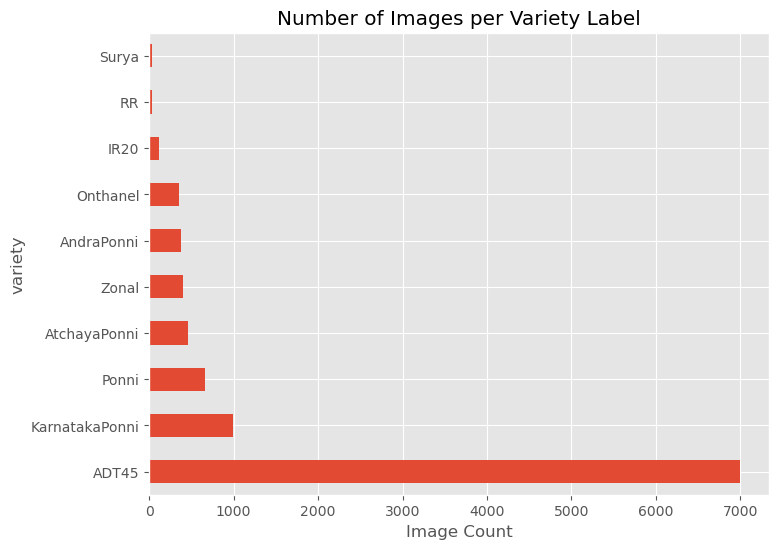

In [4]:
# Bar chart of paddy variety distribution
df["variety"].value_counts().plot(
    kind="barh", figsize=(8, 6), title="Number of Images per Variety Label"
)
plt.xlabel("Image Count")
plt.show()

The variety distribution is highly skewed, with the `ADT45` variety dominating the dataset with nearly 7,000 images. In contrast, many varieties such as `Surya`, `RR`, and `IR20` appear less than 100 times. This extreme imbalance presents a major challenge for the classification of rare varieties and must be addressed to prevent biased learning and poor generalization.


## 4.3. Distribution of Age Values

Displays a histogram and density estimate of paddy plant ages. This reveals overall skewness, variance, and clustering in the age data. Useful for age prediction and understanding developmental stages.


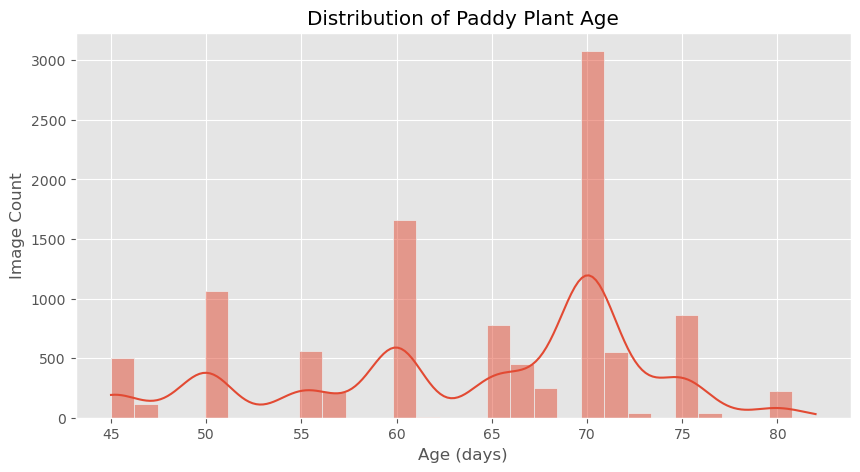

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Distribution of Paddy Plant Age")
plt.xlabel("Age (days)")
plt.ylabel("Image Count")
plt.grid(True)
plt.show()

The age histogram reveals a multimodal distribution with noticeable peaks, especially at 70 days. The data are concentrated around several fixed age points, suggesting structured sampling or data collection in specific intervals. This uneven distribution may lead to regression models performing better on high-frequency age groups while underperforming on underrepresented ranges.


## 4.4. Distribution of Age Classes (Discrete)

Displays the count of images for each exact age value. Identifies whether specific ages are overrepresented and supports decisions for bucketing, augmentation, or sampling strategies.


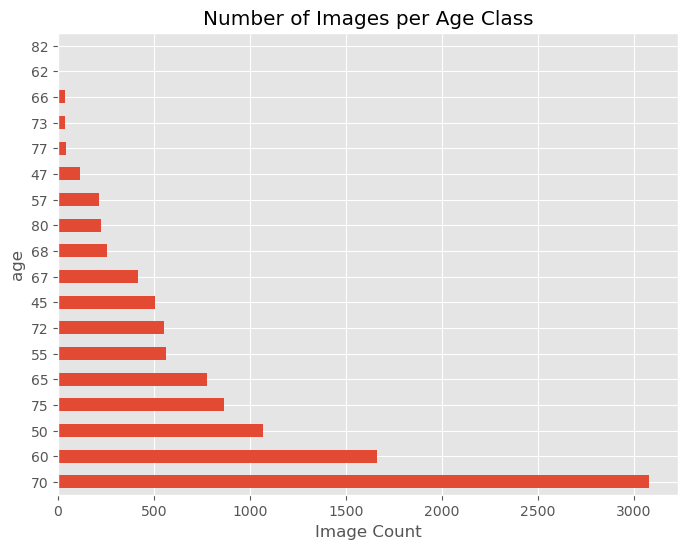

In [6]:
# Bar chart showing image count per discrete age value
df["age"].value_counts().plot(
    kind="barh", figsize=(8, 6), title="Number of Images per Age Class"
)
plt.xlabel("Image Count")
plt.show()

The count of images per discrete age value further highlights the dominance of specific age classes, particularly day 70, which alone accounts for over 3,000 samples. Several age classes are barely represented, which could impair the model’s ability to generalize across the full age spectrum. Strategies such as loss weighting or data augmentation may be necessary to compensate for this imbalance.


## 4.5. Outlier Detection in Age

Uses a boxplot to identify extreme values in the `age` variable. This visualization supports decisions regarding outlier removal, transformation, or normalization during preprocessing.


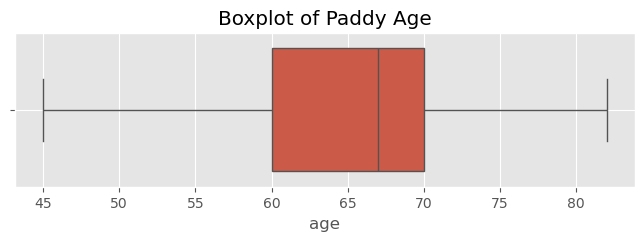

In [7]:
# Boxplot for detecting outliers in age distribution
plt.figure(figsize=(8, 2))
sns.boxplot(x=df["age"])
plt.title("Boxplot of Paddy Age")
plt.grid(True)
plt.show()

The boxplot for the age variable indicates a compact distribution with no significant outliers. The interquartile range spans roughly from 60 to 70 days, and the median age lies near 66. The absence of outliers suggests that no samples need to be removed on this basis, and the full range of age values can be retained for modeling purposes.


## 4.6. Visual Inspection of Sample Images

Displays 16 representative image samples from the dataset. Helps assess visual variation across disease classes and plant growth stages. Useful for informing CNN design and expected feature patterns.


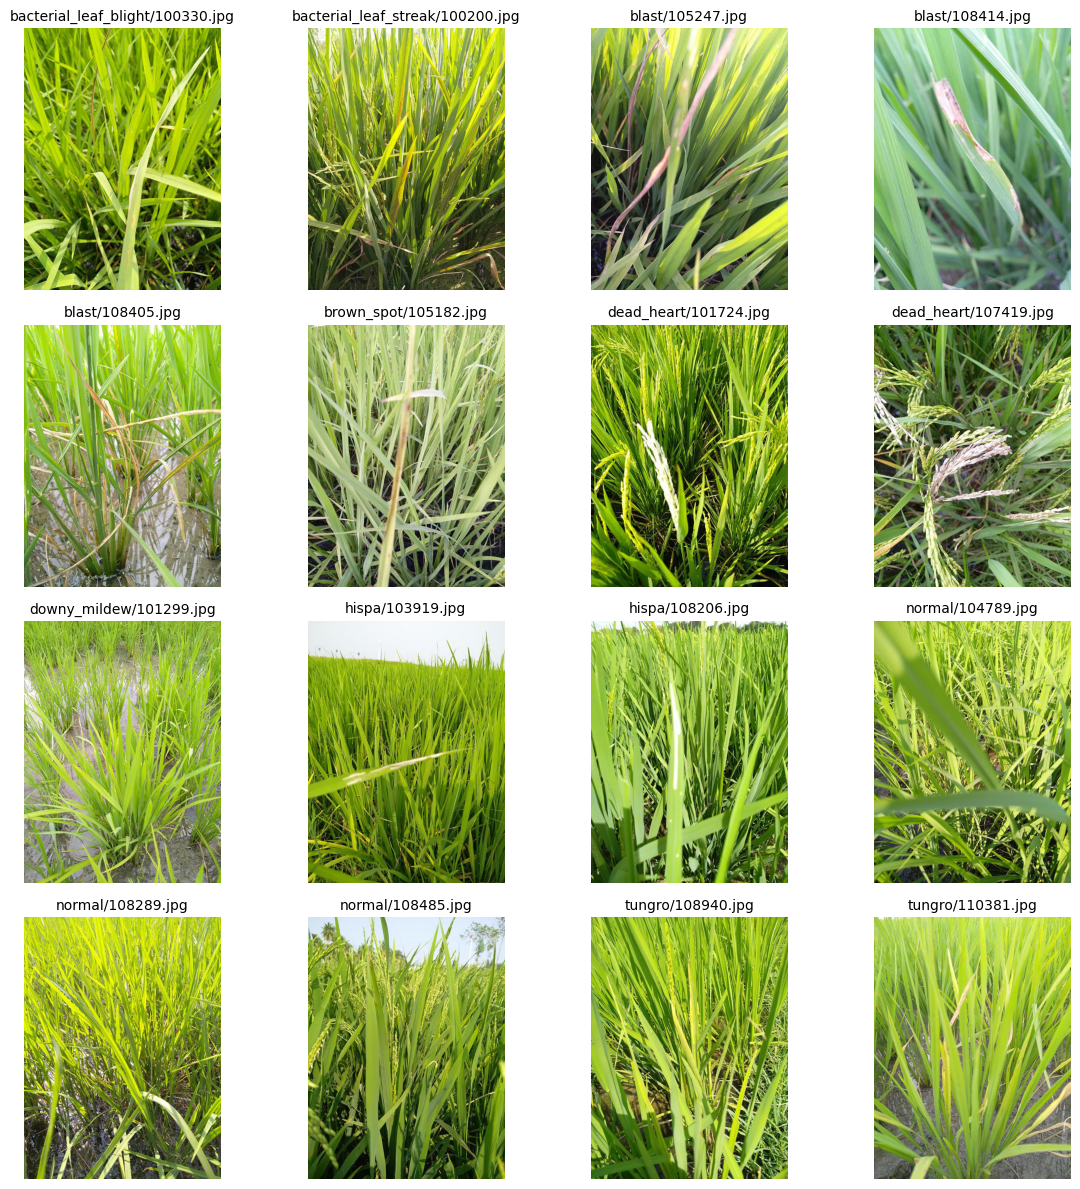

In [8]:
def data_plot_16samples(df: pd.DataFrame, to_file: str = None):
    """
    Displays a 4x4 grid of sampled paddy images with labels for manual inspection.

    Args:
        df (pd.DataFrame): DataFrame containing image paths and labels.
        to_file (str, optional): If provided, saves the figure to the specified file path.
    """
    # Select 16 evenly spaced samples across the dataset
    sample_indices = np.linspace(0, len(df) - 1, 16).astype(int)

    fig, ax = plt.subplots(4, 4, figsize=(12, 12))
    ax = ax.ravel()

    for i, idx in enumerate(sample_indices):
        row = df.iloc[idx]
        img_path = os.path.normpath(row["image_path"])

        ax[i].axis("off")
        label = row["label"]
        filename = row["image_id"]
        ax[i].set_title(f"{label}/{filename}", fontsize=10)

        try:
            with Image.open(img_path) as im:
                ax[i].imshow(im)
        except Exception as e:
            ax[i].text(
                0.5, 0.5, "Error loading image", ha="center", va="center", fontsize=8
            )
            print(f"Could not load image {img_path}: {e}")

    plt.tight_layout()
    plt.show()

    if to_file:
        fig.savefig(to_file, bbox_inches="tight")


# Display the sample grid
data_plot_16samples(df)

# 5. Observations & Discussions

- Exploratory analysis reveals clear class imbalance across all three key prediction targets: disease type (`label`), paddy variety (`variety`), and age (`age`). Without addressing these imbalances, models may exhibit biased learning, overfitting to dominant classes while underperforming on rare categories.

- To mitigate this, class balancing techniques will be applied where applicable. For classification tasks, **upsampling** will be employed to equalize class distributions. This strategy ensures that minority categories are sufficiently represented during training, improving model robustness.

- The upsampling process increases the total number of training samples, which may significantly impact training time and memory usage—especially for image data. To manage this trade-off, images will be resized according to the expanded dataset size:

  - Tasks with more than 20,000 samples will use a resolution of **128×128**.
  - Tasks with smaller datasets will retain a higher resolution of **256×256**.

- The `age` attribute shows a non-uniform, multimodal distribution, with a disproportionately high number of samples around 70 days. Regression models trained directly on this distribution may overfit to dominant age groups. This imbalance will be considered when defining evaluation strategies for Task 3.

- No significant outliers are observed in the `age` variable. Therefore, no removal is planned, and all values will be retained for training.

- Visual inspections confirm that the dataset includes a wide variety of leaf textures, colors, and disease symptoms. These visual cues provide a strong foundation for spatial pattern extraction via convolutional neural networks (CNNs), which will be leveraged in all image-based tasks.
